#Plotting Tropical Cyclones
---------------------------

This script will enable plotting of tropical cyclones from the
IBTrACS data set available at ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r08/wmo/netcdf/year/.
Each file corresponds to all cyclones present in that year. Since we have data only from 1980
onwards, you can the corresponding years for testing.

The data has three coordinates: cyclone number, centre and time. Each cyclone has a variable
named numObs which is the length of the track available for that cyclone. Rest should be self-explanatory when you read the code.

This is an example for the year 1980, download any file from the above and change!

In [1]:
%matplotlib notebook

import xarray
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


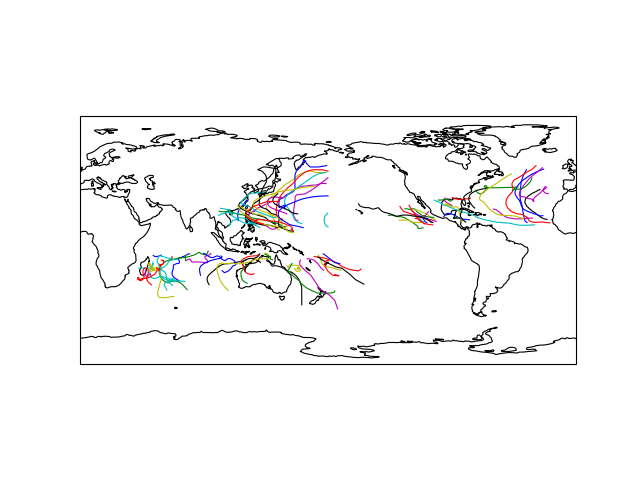

Storm  0 Time:  ['1979-11-27T06:00:00.000000000' '1979-11-27T12:00:00.000000000'
 '1979-11-27T18:00:00.000000000' '1979-11-28T00:00:00.000000000'
 '1979-11-28T06:00:00.000000000' '1979-11-28T12:00:00.000000000'
 '1979-11-28T18:00:00.000000000' '1979-11-29T00:00:00.000000000'
 '1979-11-29T06:00:00.000000000' '1979-11-29T12:00:00.000000000'
 '1979-11-29T18:00:00.000000000' '1979-11-30T00:00:00.000000000'
 '1979-11-30T06:00:00.000000000' '1979-11-30T12:00:00.000000000'
 '1979-11-30T18:00:00.000000000' '1979-12-01T00:00:00.000000000'
 '1979-12-01T06:00:00.000000000' '1979-12-01T12:00:00.000000000'
 '1979-12-01T18:00:00.000000000' '1979-12-02T00:00:00.000000000'
 '1979-12-02T06:00:00.000000000' '1979-12-02T12:00:00.000000000'
 '1979-12-02T18:00:00.000000000' '1979-12-03T00:00:00.000000000'
 '1979-12-03T06:00:00.000000000' '1979-12-03T12:00:00.000000000'
 '1979-12-03T18:00:00.000000000' '1979-12-04T00:00:00.000000000'
 '1979-12-04T06:00:00.000000000' '1979-12-04T12:00:00.000000000'
 '1979-12

In [2]:
file_name = 'Year.1980.ibtracs_wmo.v03r08.nc'

proj = ccrs.PlateCarree(central_longitude=0)
display_proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=display_proj)
ax.coastlines()
data = xarray.open_dataset(file_name)

num_storms = len(data.storm)

for i in range(num_storms):
    storm = data.loc[{'storm':i}]

    storm_length = int(storm.numObs)

    latitudes = storm.lat_wmo[0:storm_length].values
    longitudes = storm.lon_wmo[0:storm_length].values
    
    print 'Storm ', i, 'Time: ', storm.time_wmo[0:storm_length].values

    #Work around, since cartopy expects data between 0 and 360 to work best
    longitudes[longitudes<0] += 360

    ax.plot(longitudes, latitudes, transform=proj)
ax.set_global()